# Bagging Regressor

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor

## Read dataset

In [2]:
data_train = pd.read_csv('trainset_w_lle.csv')
data_test = pd.read_csv('testset_w_lle.csv')
data_train.head()

,attendance,is_federal_holiday,venue,on_grass,temperature,wind_speed,team1_name,team1_pre_win,team1_pre_loss,team1_pre_win_pct,...,start_hour,start_hour_label_afternoon,start_hour_label_evening,start_hour_label_night,start_hour_label_noon,game_page_url,start_time,previous_5_to_10MA,lle1,lle2
0,35055,0,Wrigley Field,1,-2.786672,-0.093090,STL,-1.62645,-1.654514,0.0,...,19,0,1,0,0,https://www.baseball-reference.com/boxes/CHN/C...,2015-04-05 19:17:00,32742.135802,0.007683,0.000329
1,45030,0,Comerica Park,1,-2.031671,-0.489072,MIN,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/DET/D...,2015-04-06 13:08:00,36014.925926,0.008566,0.006095
2,45909,0,Safeco Field,1,-1.842921,-1.281036,LAA,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/SEA/S...,2015-04-06 13:12:00,25485.604938,0.003695,0.009393
3,53518,0,Dodger Stadium,1,-0.804795,-1.281036,SDP,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/LAN/L...,2015-04-06 13:12:00,46695.518519,0.007517,0.002310
4,48469,0,Yankee Stadium III,1,-1.842921,-0.489072,TOR,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/NYA/N...,2015-04-06 13:13:00,42520.300000,0.006798,-0.005155


In [3]:
data_train.columns

Index(['attendance', 'is_federal_holiday', 'venue', 'on_grass', 'temperature',
       'wind_speed', 'team1_name', 'team1_pre_win', 'team1_pre_loss',
       'team1_pre_win_pct', 'team1_streak', 'team2_name', 'team2_pre_win',
       'team2_pre_loss', 'team2_pre_win_pct', 'team2_streak', 'salary-500-800',
       'salary-800-1500', 'salary-1500', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'month_April', 'month_August', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'weather_Cloudy', 'weather_Drizzle',
       'weather_In Dome', 'weather_Overcast', 'weather_Rain', 'weather_Sunny',
       'season_type', 'season', 'home_team_avg_att_last_year', 'start_hour',
       'start_hour_label_afternoon', 'start_hour_label_evening',
       'start_hour_label_night', 'start_hour_label_noon', 'game_page_url',
       'start_time', 'previous_5_to_10MA', 'lle

In [4]:
from sklearn.preprocessing import StandardScaler
# standardize
number_col = ['previous_5_to_10MA']

# Standardize features by removing the mean and scaling to unit variance.
xscaler = StandardScaler().fit(data_train[number_col])
#standardize feature values
data_train[number_col] = xscaler.transform(data_train[number_col])
data_test[number_col] = xscaler.transform(data_test[number_col])

In [5]:
data_train.drop(['venue', 'start_hour', 'start_time', 'game_page_url'], axis=1, inplace=True)
data_test.drop(['venue', 'start_hour', 'start_time', 'game_page_url'], axis=1, inplace=True)

In [6]:
data_train = pd.get_dummies(data_train, columns=['team1_name', 'team2_name', 'season_type'])
data_test = pd.get_dummies(data_test, columns=['team1_name', 'team2_name', 'season_type'])

In [7]:
train_cols = data_train.columns.tolist()
data_test = data_test[train_cols].copy()

In [8]:
print(set(data_train.columns) - set(data_test.columns))
print(set(data_test.columns) - set(data_train.columns))

set()
set()


In [9]:
data_train.columns

Index(['attendance', 'is_federal_holiday', 'on_grass', 'temperature',
       'wind_speed', 'team1_pre_win', 'team1_pre_loss', 'team1_pre_win_pct',
       'team1_streak', 'team2_pre_win',
       ...
       'team2_name_SDP', 'team2_name_SEA', 'team2_name_SFG', 'team2_name_STL',
       'team2_name_TBR', 'team2_name_TEX', 'team2_name_TOR', 'team2_name_WSN',
       'season_type_post', 'season_type_regular'],
      dtype='object', length=109)

In [10]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)

In [11]:
y_train = data_train['attendance'].to_numpy()
y_test = data_test['attendance'].to_numpy()

data_train.drop(['attendance'], axis=1, inplace=True)
data_test.drop(['attendance'], axis=1, inplace=True)

x_train = data_train.to_numpy()
x_test = data_test.to_numpy()

print(x_train.shape)

(12270, 108)


## kfold

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
n_estimators_grid = np.geomspace(10, 1000, 10, endpoint=True, dtype=int) # 10 numbers between 10 and 1000
parameters = {'n_estimators' : n_estimators_grid}
model = BaggingRegressor(random_state=42)
clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring=scoring, refit='neg_root_mean_squared_error')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': array([  10,   16,   27,   46,   77,  129,  215,  359,  599, 1000])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [14]:
print("Best estimators:", clf.best_estimator_)
print("Best parameters:", clf.best_params_)

Best estimators: BaggingRegressor(n_estimators=1000, random_state=42)
Best parameters: {'n_estimators': 1000}


In [15]:
df_res = pd.DataFrame(data=clf.cv_results_)
df_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
0,3.281755,0.180765,0.104873,0.043572,10,{'n_estimators': 10},-2.472859e+07,-2.251040e+07,-2.436446e+07,-2.591753e+07,...,74.268989,10,-0.142698,-0.140328,-0.147282,-0.148857,-0.141545,-0.144142,0.003331,10
1,5.851016,0.344457,0.116401,0.014178,16,{'n_estimators': 16},-2.333123e+07,-2.135282e+07,-2.312528e+07,-2.460462e+07,...,71.767320,9,-0.139832,-0.137849,-0.143212,-0.144900,-0.137617,-0.140682,0.002910,9
2,9.071096,0.580153,0.174001,0.031516,27,{'n_estimators': 27},-2.266615e+07,-2.092231e+07,-2.235544e+07,-2.350341e+07,...,71.034869,8,-0.138759,-0.137010,-0.140933,-0.141833,-0.134705,-0.138648,0.002593,8
3,14.602293,1.300136,0.185200,0.006013,46,{'n_estimators': 46},-2.246959e+07,-2.044115e+07,-2.204131e+07,-2.319690e+07,...,74.076484,7,-0.138141,-0.135201,-0.140153,-0.140086,-0.133683,-0.137453,0.002607,7
4,22.759502,1.084773,0.355984,0.094060,77,{'n_estimators': 77},-2.224775e+07,-2.021625e+07,-2.178026e+07,-2.306780e+07,...,70.585748,6,-0.137105,-0.134463,-0.139441,-0.140038,-0.132710,-0.136751,0.002819,6


## Train with best params

In [16]:
br = BaggingRegressor(n_estimators=1000, random_state=42)
br = br.fit(x_train, y_train)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
train_predict = br.predict(x_train)
print("Train MSE:", mean_squared_error(y_train, train_predict))
print("Train RMSE:", mean_squared_error(y_train, train_predict, squared=False))
print("Train MAE:", mean_absolute_error(y_train, train_predict))
print("Train MAPE:", mean_absolute_percentage_error(y_train, train_predict))

Train MSE: 2803396.9799364423
Train RMSE: 1674.3347872920883
Train MAE: 1220.1309039119803
Train MAPE: 0.04877887360974677


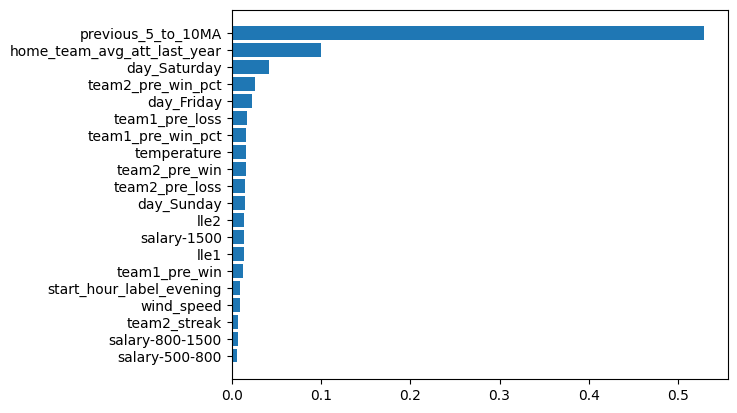

In [21]:
# matplotlib
import matplotlib.pyplot as plt

feature_importances = np.mean([
    tree.feature_importances_ for tree in br.estimators_
], axis=0)

num_features = 20

indices = np.argsort(feature_importances)[::-1][:num_features]

fig, ax = plt.subplots()
ax.barh(range(num_features), feature_importances[indices][::-1])
ax.set_yticks(range(num_features))
_ = ax.set_yticklabels(np.array(data_train.columns)[indices][::-1])
# font size
plt.rcParams.update({'font.size': 8})

In [22]:
feature_importances[indices][::-1]

array([0.0062269 , 0.00658438, 0.00665925, 0.00895665, 0.00974634,
       0.01223174, 0.01347008, 0.01399294, 0.01402935, 0.01515095,
       0.01533082, 0.01587853, 0.01607371, 0.01638866, 0.0171854 ,
       0.02271372, 0.02617917, 0.04186902, 0.09986817, 0.52914992])

## Testing set

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
y_pred = br.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_pred))

Test MSE: 45683154.48039606
Test RMSE: 6758.931459956971
Test MAE: 5278.125982413088
Test MAPE: 0.2645739388893955


## Save model

In [24]:
import pickle
from datetime import datetime
time = datetime.today().strftime('%Y%m%d_%H%M%S')
filename = f'./model/br_model_{time}.sav'
pickle.dump(br, open(filename, 'wb'))
cv_filename = f'./model/br_model_{time}_cv.csv'
df_res.to_csv(cv_filename, index=False)
# loaded_model = pickle.load(open(filename, 'rb'))